    Source : UCI MACHINE LEARNING REPOSITORY
    Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Housing_data.csv to Housing_data (1).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Housing_data.csv']))

In [0]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
#df.info()

In [0]:
#df.describe()

In [0]:
#df.hist(bins=50,figsize=(20,15))

In [0]:
from sklearn.preprocessing import StandardScaler
scaled_features = df.copy()


In [0]:
col_names = df.columns


In [0]:
b=col_names.tolist()

In [0]:
b.remove('MEDV  ')

In [0]:
b.remove('CHAS')


In [0]:
features = scaled_features[b]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [0]:
scaled_features[b] = features
#print(scaled_features)

In [0]:
X=scaled_features.drop('MEDV  ',axis=1)
y=scaled_features['MEDV  ']

In [0]:
#X2=df.drop('MEDV  ',axis=1)
#y2=df['MEDV  ']

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y, stratify=df['CHAS'],test_size=0.2,random_state=1234)

In [0]:
#X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2, stratify=df['CHAS'],test_size=0.2,random_state=1234)

In [0]:
df2=pd.concat([X_train,y_train],axis=1)

In [0]:
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
303,-0.408880,0.971543,-0.736372,0,-1.051242,0.993508,-1.809141,0.806539,-0.293081,-0.470612,-1.089110,0.370113,-1.092383,33.1
150,-0.227734,-0.487722,1.231945,0,2.732346,-0.231698,1.021481,-1.034899,-0.523001,-0.031105,-1.736418,0.176811,0.202823,21.5
70,-0.410246,-0.487722,-0.047680,0,-1.224009,0.188576,-2.203863,0.709373,-0.637962,-0.613155,0.344213,0.296651,-0.831660,24.2
371,0.653875,-0.487722,1.015999,0,0.659147,-0.097781,1.117494,-1.248292,1.661245,1.530926,0.806576,0.103898,-0.437772,50.0
421,0.396724,-0.487722,1.015999,0,1.410682,-0.396959,0.950360,-0.912919,1.661245,1.530926,0.806576,-0.402327,0.427101,14.2


In [0]:
from sklearn.linear_model import LassoCV

In [0]:
reg = LassoCV(cv=10, random_state=1234)
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X_train.columns)

Best alpha using built-in LassoCV: 0.015851
Best score using built-in LassoCV: 0.739717


In [0]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 13 variables and eliminated the other 0 variables


In [0]:
from pandas import Series, DataFrame
coeff = DataFrame(X_train.columns)

coeff['Coefficient Estimate'] = Series(reg.coef_)

coeff

,0,Coefficient Estimate
0,CRIM,-0.636336
1,ZN,0.833373
2,INDUS,-0.097062
3,CHAS,2.918971
4,NOX,-1.944774
5,RM,2.822504
6,AGE,-0.055659
7,DIS,-3.055161
8,RAD,2.094006
9,TAX,-1.721090


Text(0.5, 1.0, 'Feature importance using Lasso Model')

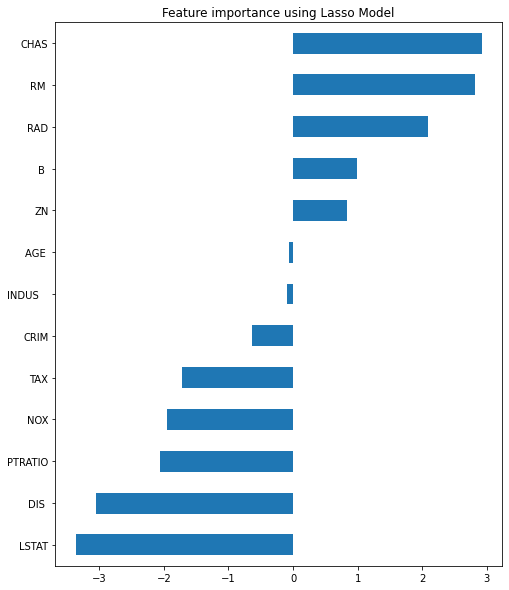

In [0]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

          IMPORTANCE
FEATURE             
RM             0.429
LSTAT          0.379
DIS            0.064
CRIM           0.041
NOX            0.024
AGE            0.018
PTRATIO        0.016
B              0.011
TAX            0.009
INDUS          0.005
RAD            0.004
ZN             0.001
CHAS           0.000


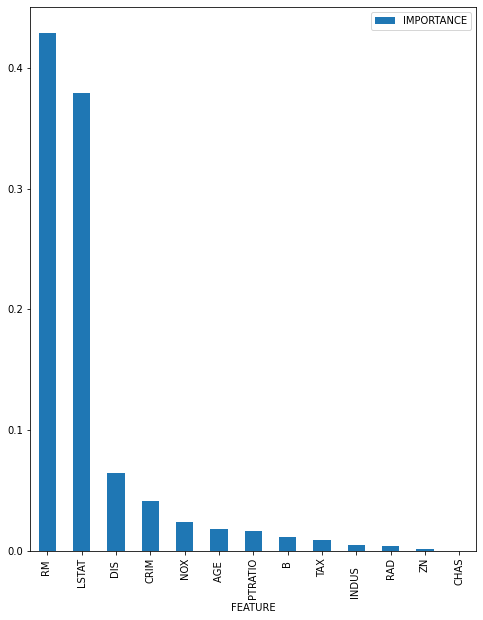

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
importances = pd.DataFrame({'FEATURE':X_train.columns,'IMPORTANCE':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('IMPORTANCE',ascending=False).set_index('FEATURE')

print(importances)
importances.plot.bar()
plt.show()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


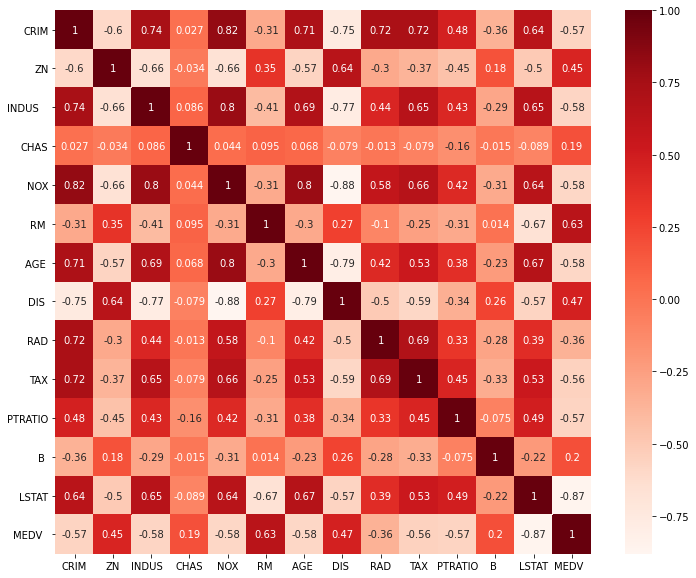

In [0]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df2.corr(method ='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
cor_target = abs(cor["MEDV  "])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

CRIM        0.569319
INDUS       0.577822
NOX         0.584083
RM          0.634451
AGE         0.581008
TAX         0.555297
PTRATIO     0.565422
LSTAT       0.866164
MEDV        1.000000
Name: MEDV  , dtype: float64

In [0]:
b

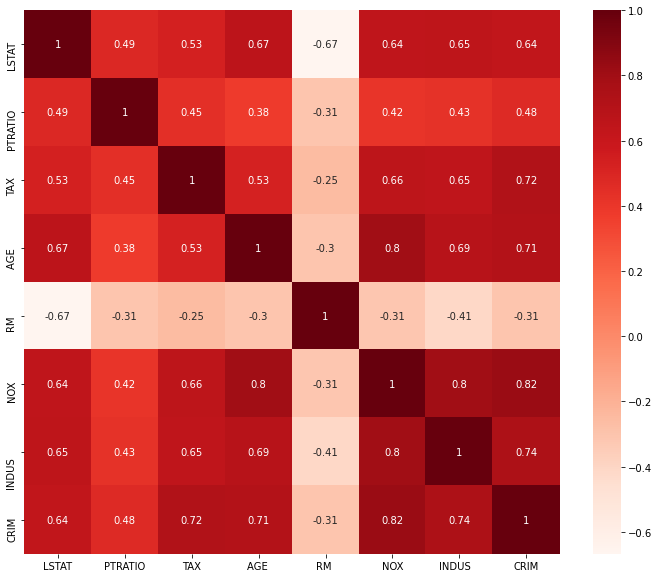

In [0]:
plt.figure(figsize=(12,10))
cor = df2[["LSTAT","PTRATIO",'TAX','AGE ','RM ','NOX','INDUS   ','CRIM']].corr(method ='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#print(df2[["LSTAT","PTRATIO",'TAX','AGE ','RM ','NOX','INDUS   ','CRIM']].corr(method ='spearman'))
#print(df2[["RM","LSTAT"]].corr())

FEATURES: 
1] LSTAT
2] RM
3]

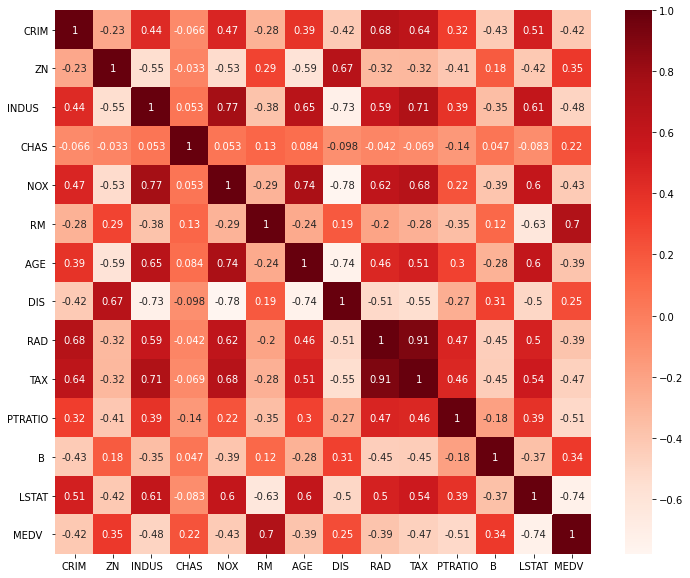

RM         0.702742
PTRATIO    0.510287
LSTAT      0.735005
MEDV       1.000000
Name: MEDV  , dtype: float64

In [0]:
plt.figure(figsize=(12,10))
cor = df2.corr(method ='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
cor_target = abs(cor["MEDV  "])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

In [0]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
nof_list=np.arange(1,13)            
high_score=6
model = RandomForestRegressor() 
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train,y_train, test_size = 0.2, random_state = 1234)
    #model = LassoCV()
    rfe = RFE(model,nof_list[n])
    
    #rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(2),
              #scoring='accuracy')
    X_train_rfe = rfe.fit_transform(X_train2,y_train2)
    X_test_rfe = rfe.transform(X_test2)
    model.fit(X_train_rfe,y_train2)
    #score = model.score(X_test_rfe,y_test2)
    #score_list.append(score)
    predictions=model.predict(X_test_rfe)
    sc=mean_squared_error(y_test2,predictions)
    score=np.sqrt(sc)
    print(score)
    if(score<high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

5.716030469324414
4.471700644533463
4.64301823663003
4.457925551444555
4.378309092123677
4.201301341603929
3.9350230567037485
3.941641149396693
3.9168569299728753
3.9363722676634154
3.991094724353886
3.935546031734508
Optimum number of features: 9
Score with 9 features: 3.916857


In [0]:
cols = col_names.to_list()
cols.remove('MEDV  ')
#model = LinearRegression()
#Initializing RFE model
rfe= RFE(model,10)            
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model
model.fit(X_rfe,y_train)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['CRIM', 'INDUS   ', 'NOX', 'RM ', 'AGE ', 'DIS ', 'TAX', 'PTRATIO',
       'B ', 'LSTAT'],
      dtype='object')


In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [0]:
model=RandomForestRegressor(random_state=1234)
#model.fit(X_train,y_train)
scores=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-scores)

In [0]:
rmse_score.mean()

3.501719914330539

In [0]:
rmse_score.std()

0.7096184242565389

In [0]:
col_names

Index(['CRIM', 'ZN', 'INDUS   ', 'CHAS', 'NOX', 'RM ', 'AGE ', 'DIS ', 'RAD',
       'TAX', 'PTRATIO', 'B ', 'LSTAT', 'MEDV  '],
      dtype='object')

In [0]:
xt=X_train.drop(['ZN','CHAS', 'RAD'], axis=1)

In [0]:
#model=RandomForestRegressor()
#model.fit(X_train,y_train)
scores=cross_val_score(model,xt,y_train,scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-scores)

In [0]:
rmse_score.mean()

3.4709192736599705

In [0]:
xt=X_train[['LSTAT','DIS ','NOX','RM ','CRIM','AGE ','PTRATIO',]]


In [0]:
#model=RandomForestRegressor()
#model.fit(X_train,y_train)
scores=cross_val_score(model,xt,y_train,scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-scores)

In [0]:
rmse_score.mean()

3.506594592999638

In [0]:
xt=X_train[['LSTAT','DIS ','NOX','RM ','CRIM','AGE ','PTRATIO','B ',]]
#model=RandomForestRegressor()
#model.fit(X_train,y_train)
scores=cross_val_score(model,xt,y_train,scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-scores)
rmse_score.mean()

3.488224907674863

In [0]:
xt_final=X_train[['LSTAT','DIS ','NOX','RM ','CRIM','AGE ','PTRATIO','B ','TAX']]
#model=RandomForestRegressor()
#model.fit(X_train,y_train)
scores=cross_val_score(model,xt_final,y_train,scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-scores)
rmse_score.mean()

3.4461346479570993

In [0]:
xt=X_train[['LSTAT','DIS ','NOX','RM ','CRIM','AGE ','PTRATIO','B ','TAX','INDUS   ']]
#model=RandomForestRegressor()
#model.fit(X_train,y_train)
scores=cross_val_score(model,xt,y_train,scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-scores)
rmse_score.mean()

3.44871708250563

In [0]:
xt=X_train[['LSTAT','DIS ','NOX','RM ','CRIM','AGE ','PTRATIO','B ','TAX','INDUS   ','RAD','ZN']]
#model=RandomForestRegressor()
#model.fit(X_train,y_train)
scores=cross_val_score(model,xt,y_train,scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-scores)
rmse_score.mean()

3.4989118118060056

In [0]:
xtest=X_test[['LSTAT','DIS ','NOX','RM ','CRIM','AGE ','PTRATIO','B ','TAX']]

In [0]:
model.fit(xt_final,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

In [0]:
predi=model.predict(xtest)

In [0]:
final_mse=mean_squared_error(y_test,predi)

In [0]:
final_rmse=np.sqrt(final_mse)

In [0]:
final_rmse

3.245269661595256